# Notes

In many real applications, we need to model the phenomenoa with their rate of change. There are many examples in physics, biology, chemistry, demography etc.

Besides, most of the models involving differential equations don't have an analytic solution. That means we may not be able to find an explicit formula of the solution $f(x)$. Hence, using numerical methods is a common and essential approach to deal with models with differential equations.

In particular, ordinary differential equations (ODEs) are differential equations that depend on only a single independent variable (e.g. time $t$). We will demonstrate the numerical ODE solver in Python below.

## ```Example 1 (1st Order IVP)```

One type of ODE problems are the **initial value problems** (IVP), in which we are given an ordinary differential equation together with an initial condition specifying the value of the function at a certain point.

The general form of a first order initial value problem (1st order IVP) is as follows.

$$\left\{\begin{align*}
x'(t) &= f(t, x)\\
x(t_0) &= x_0
\end{align*}
\right.$$

The solution we want is $x(t)$, which is usually a function of $t$ (time). $f(t, x)$ is a given function of $t$ and $x(t)$ (we will just write $x$ afterwards). We also have an initial value $x_0$ when $t = t_0$.

Suppose we are going to solve the following 1st order IVP problem.

$$\left\{\begin{align*}
x'(t) &= 3x^2 - 5\\
x(0) &= 0
\end{align*}
\right.$$

in the time interval $0 \leq t \leq 1$.

### _Step 1: Define the 1st order IVP_

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint

In [ ]:
def dxdt(t, x):          # This is a self-defined function in Python. You may define your own function using this format
    return 3*x**2 - 5
x0 = 0                   # the initial value

In [ ]:
t = np.linspace(0, 1, 100) # We define the time interval by splitting the interval into 100 evenly distributed points.

### _Step 2: Call the numerical ODE solver in Python_

In [ ]:
# The solver will solve the the values of x(t) at all the 100 points in the time interval.
sol = odeint(dxdt, x0, t, tfirst = True)

# Descriptions:
# odeint(<the_IVP>, <initial_value>, <time_interval>, tfirst = True)

# About "tfirst = True":
# When we define the IVP in the previous cell, we type "dxdt(t, x)", which we put t first. "odeint()" needs to confirm
# whether we type "dxdt(t, x)" or "dxdt(x, t)".

### _Step 3: Plot the solution function_

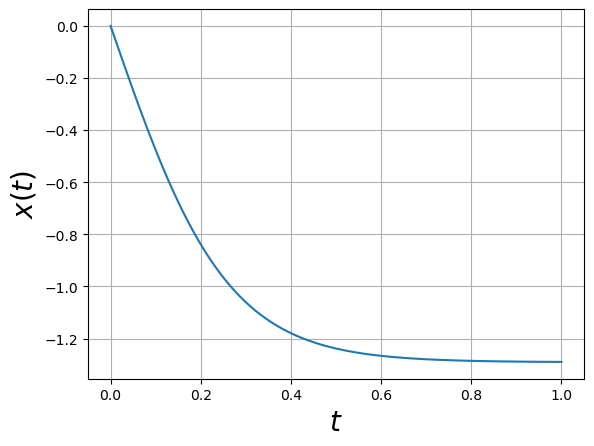

In [ ]:
# We may plot the 100 points of x(t) with respect to t from 0 to 1.

plt.plot(t, sol)
plt.ylabel('$x(t)$', fontsize = 20)
plt.xlabel('$t$', fontsize = 20)
plt.grid()
plt.show()

# Exercises

1. Find the numerical approximation of the following 1st order IVP for the solution $x(t)$ in the interval $0 \leq t \leq 0.5$.

$$
\left\{\begin{align*}
x'(t) &= x^2 + 2t\sin(\pi t) \\
x(0) &= 1
\end{align*}\right.
$$

In [ ]:
def dxdt(t, x):
    return x**2 + 2*t*np.sin(np.pi*t)
x_0 = 1

In [ ]:
t = np.linspace(0, 0.5, 100)
sol = odeint(dxdt, x_0, t, tfirst = True)

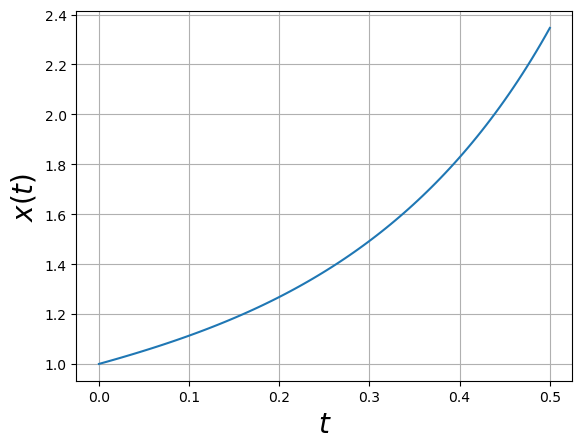

In [ ]:
plt.plot(t, sol)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$x(t)$', fontsize = 20)
plt.grid()
plt.show()

2. Find the numerical approximation of the following 1st order IVP for the solution $x(t)$ in the interval $1 \leq t \leq 3$.

$$
\left\{\begin{align*}
x'(t) &= t^{-2}(tx-x^2) \\
x(1) &= 2
\end{align*}\right.
$$

In [ ]:
def dxdt(t, x):
    return (t*x-x**2)/(t**2)
x_0 = 2

In [ ]:
t = np.linspace(1, 3, 200)
sol = odeint(dxdt, x_0, t, tfirst = True)

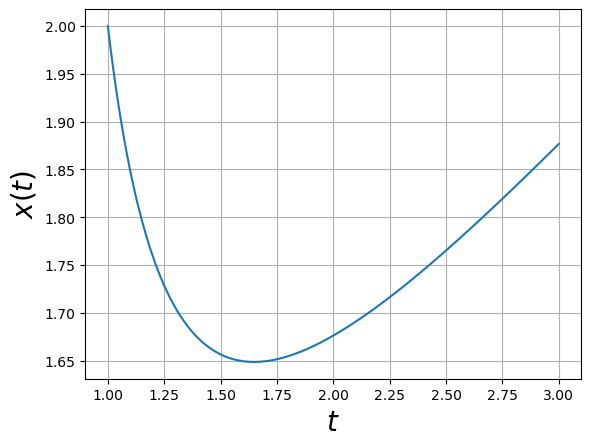

In [ ]:
plt.plot(t, sol)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$x(t)$', fontsize = 20)
plt.grid()
plt.show()

3. Consider the following **exponential growth model**, where $k$ is a constant determined by the data set in the applied scenario.

$$
\left\{\begin{align*}
N'(t) &= kN(t)\\
N(t_0) &= N_0
\end{align*}\right.
$$

This IVP has an analytic solution given below.

$$N(t) = N_0\exp[k(t-t_0)]$$

(a) Put $k=2$, $t_0 = 1$ and $N_0 = 0.01$. Find the numerical approximation of $N(t)$ in the interval $1 \leq t \leq 2$.

In [ ]:
def exp(t, N):
    return 2*N
N_0 = 0.01

In [ ]:
t = np.linspace(1, 2, 100)
sol = odeint(exp, N_0, t, tfirst = True)

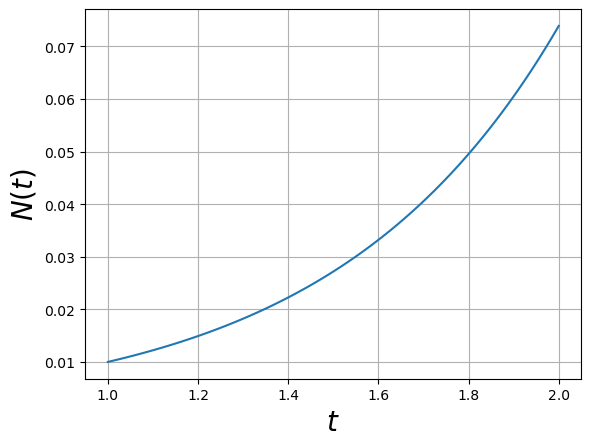

In [ ]:
plt.plot(t, sol)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$N(t)$', fontsize = 20)
plt.grid()
plt.show()

(b) Find the value of $N(t)$ by the analytic solution. Compute the percentage error of the approximation by the Python solver.

In [ ]:
exact_n = np.reshape(N_0*np.exp(2*(t-1)), (100, 1))

In [ ]:
per_err = (sol-exact_n)/exact_n*100

In [ ]:
print('The following are all percentages.')
print(per_err[:10])      # We only display the first 10 percentage error for simplicity.

# You may find that the average percentage error is around 0.00001%, which is small.

The following are all percentages.
[[ 0.00000000e+00]
 [ 6.12905744e-05]
 [ 4.62861075e-05]
 [ 1.67336150e-04]
 [ 8.94198727e-05]
 [-1.94743823e-06]
 [-1.73255800e-05]
 [-1.58659857e-06]
 [ 1.52796571e-05]
 [ 2.22567475e-05]]


4. Consider the following **logistic growth model**, where $r$ and $M$ are constants determined by the data set in the applied scenario.

$$
\left\{\begin{align*}
P'(t) &= r(M-P)P\\
P(t_0) &= P_0
\end{align*}\right.
$$

This IVP has an analytic solution given below.

$$P(t) = \frac{MP_0}{P_0 + (M-P_0)\exp[-rM(t-t_0)]}$$

Note that logistic growth model has an important property, having an upper bound $M$, while exponential growth model does not have. Expressing in mathematical symbols, we have

$$\lim_{t\to\infty} P(t) = M.$$

(a) Put $r = 0.001$, $M = 700$, $t_0 = 0$ and $P_0 = 5$. Find the numerical approximation of $P(t)$ in the time interval $0 \leq t \leq 10$. Please divide the interval into more than 100 data points for a better approximation.

In [ ]:
r = 0.0001
M = 700
P_0 = 5
t_0 = 0

In [ ]:
def lgm(t, P):
    return r*(M-P)*P

In [ ]:
t = np.linspace(0, 10, 1000)
sol = odeint(lgm, P_0, t, tfirst = True)

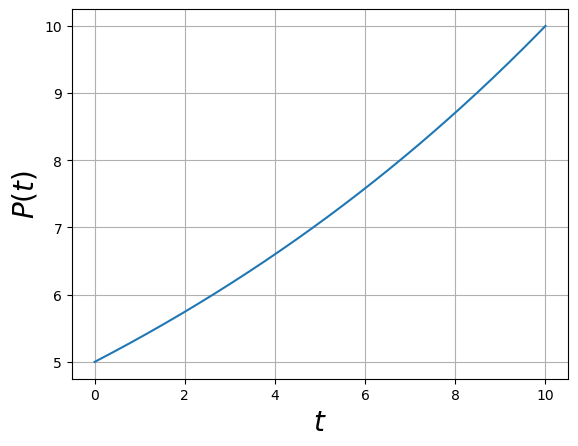

In [ ]:
plt.plot(t, sol)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$P(t)$', fontsize = 20)
plt.grid()
plt.show()

(b) Find the value of $P(t)$ by using the analytic solution. Compute the percentage error of the approximation by the Python solver.

In [ ]:
exact_p = np.reshape((M*P_0)/(P_0 + (M-P_0)*np.exp(-r*M*(t-t_0))), (1000, 1))
per_err = (exact_p-sol)/exact_p*100

In [ ]:
print('The following are all percentages.')
print(per_err[:10])

# You may find that the average percentage error is around 0.000000001%, which is small.

The following are all percentages.
[[ 0.00000000e+00]
 [-4.52963070e-09]
 [-8.43816742e-09]
 [-1.04945331e-08]
 [-1.43332899e-08]
 [-6.92172078e-09]
 [ 7.89574216e-09]
 [ 2.84829849e-08]
 [ 5.32300452e-08]
 [ 8.05530119e-08]]


(c) The analytic solution of logistic growth model has another form which is more convenient for further analyis,

$$P(t) = \frac{M}{1 + \exp[-rM(t-t^*)]},$$

where $P(t^*) = 0.5M$. That means $t^*$ denote the time when the population $P$ reaches half of the limiting value $M$. By using the original form of $P(t)$, find a general formula of $t^*$. Then compute $t^*$ when $r=0.001$ and $M=700$.

In [ ]:
# The general formula of t* = t_0 - (1/(rM))*ln(P_0/(M-P_0))

t_s = t_0 - (1/(r*M))*np.log(P_0/(M-P_0))

In [ ]:
print(t_s)

70.49248475900987


(d) Plot the graph of $P(t)$ in the interval $0 \leq t \leq 200$, the straight line $y=M$ and the point $(t^*, 0.5M)$. This graph should help you understand the nature of parameters mentioned in part (c).

In [ ]:
t = np.linspace(0, 200, 1000)
exact_p = M/(1 + np.exp(-r*M*(t-t_s)))
m = np.ones(1000)*M

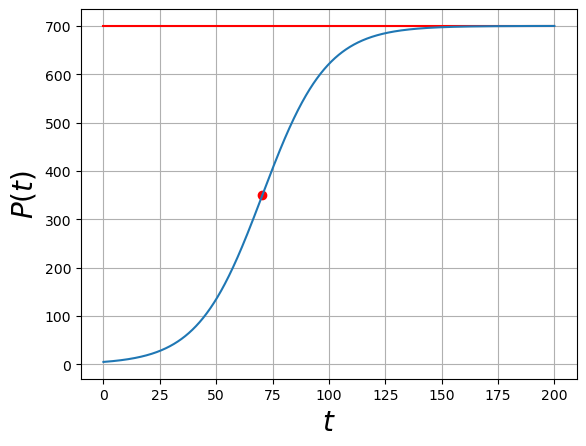

In [ ]:
plt.scatter(t_s, 0.5*M, color = 'red')
plt.plot(t, m, 'r')
plt.plot(t, exact_p)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$P(t)$', fontsize = 20)
plt.grid()
plt.show()